In [1]:
# get data

import pandas as pd

df = pd.read_csv('../testdata/data_combined.csv', sep=',', names=["Category", "Sentence"])

df.head()

,Category,Sentence
0,culture,indigenous woman chile teaches aymara ancestry...
1,culture,arabia difference etiquette wearing slippers l...
2,culture,slow look around patient means embracing thing...
3,culture,culturescountries outside usa western europe v...
4,culture,fake government birds heard right couldnt beli...


In [11]:
#convert text into BERT features

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

best_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
best_model = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1")

text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = best_preprocess(text_input)
outputs = best_model(preprocessed_text)

l = tf.keras.layers.Dropout(0.1, name='dropout')(outputs['pooled_output'])
#run a sentence through the model to see what the output looks like

model = tf.keras.Model(inputs=[text_input], outputs = [l])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [19]:
#get features of all sentences in df
# add features to df

import numpy as np

features = model.predict(list(df.Sentence.to_numpy()))


#add features to df, create 512 feature columns



1119/1119 [==============================] - 4880s 4s/step


ValueError: Expected a 1D array, got an array with shape (35780, 512)

In [20]:
for i in range(512):
    df['feature'+str(i)] = features[:,i]

df.head()

C:\Users\jfitz\AppData\Local\Temp\ipykernel_18160\595381410.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['feature'+str(i)] = features[:,i]
C:\Users\jfitz\AppData\Local\Temp\ipykernel_18160\595381410.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['feature'+str(i)] = features[:,i]
C:\Users\jfitz\AppData\Local\Temp\ipykernel_18160\595381410.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

,Category,Sentence,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature502,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511
0,culture,indigenous woman chile teaches aymara ancestry...,0.995576,0.960013,-0.031196,-0.135511,-0.302197,0.894637,0.999841,-0.933005,...,-0.079259,0.142582,-0.008863,-0.875931,0.825279,0.069431,0.171487,0.129478,-0.580688,-0.745156
1,culture,arabia difference etiquette wearing slippers l...,0.960930,0.904113,0.109021,-0.038864,0.493424,0.836760,0.954490,-0.992065,...,-0.356438,0.000843,0.442349,-0.258845,-0.574733,-0.609058,0.258128,-0.063019,-0.342108,-0.973119
2,culture,slow look around patient means embracing thing...,0.890344,0.995789,0.198350,0.417003,0.649745,0.670847,0.989339,-0.993998,...,-0.170490,-0.259954,0.444608,-0.176493,0.600715,-0.850926,0.247131,0.378784,-0.275310,-0.980052
3,culture,culturescountries outside usa western europe v...,0.847793,0.926058,-0.469106,-0.023074,0.171268,0.940772,0.991249,-0.975448,...,0.262706,0.153064,0.158489,0.263989,0.048891,-0.271821,0.298571,-0.009983,-0.151049,-0.892919
4,culture,fake government birds heard right couldnt beli...,0.968329,0.976331,0.014926,-0.135471,-0.327318,0.382107,0.996562,-0.992141,...,-0.011878,0.196030,-0.241191,-0.246636,0.955062,-0.784501,0.311398,-0.241165,-0.341156,-0.838892


In [28]:
#perform PCA on features

from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df.iloc[:,2:])
principalDf = pd.DataFrame(data = principalComponents, columns = [f'pc{i}' for i in range(1,6)])




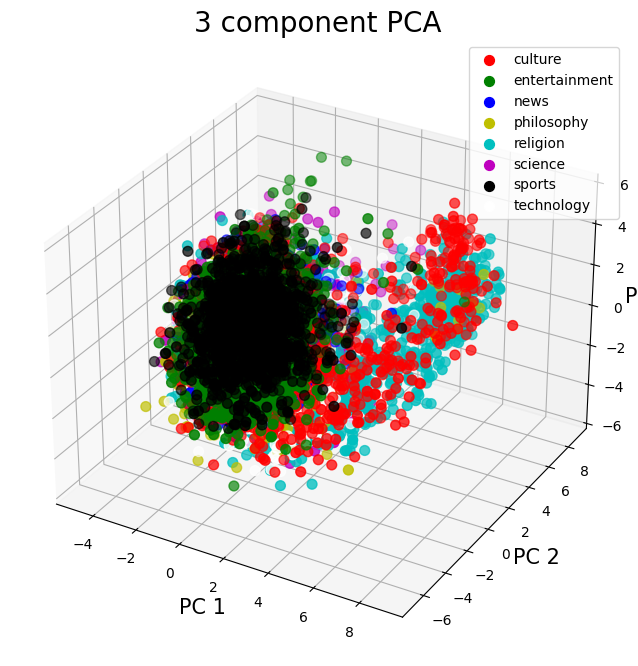

In [41]:
#plot top 2 PCs and color by category

import matplotlib.pyplot as plt

finalDf = pd.concat([principalDf, df[['Category']]], axis = 1)

#plot top 3 PCs and color by category in 3D

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_zlabel('PC 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
targets = df.Category.unique()

colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'w']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Category'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc3']
               , finalDf.loc[indicesToKeep, 'pc2']
               , finalDf.loc[indicesToKeep, 'pc4']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


